<a href="https://colab.research.google.com/github/iamviji/project/blob/master/misc/ber_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ldpc_ber.py
# Author: Mason del Rosario
# Implement BER curve for a given regular LDPC code
!pip install pyldpc
# call libs
import numpy as np
import matplotlib.pyplot as plt
import time
from pyldpc import make_ldpc, encode, decode, get_message

     |████████████████████████████████| 1.1MB 3.4MB/s 
  Created wheel for pyldpc: filename=pyldpc-0.7.9-cp36-none-any.whl size=14306 sha256=8ede36ef33795a32a87a4beb106e6c718f48f8101e86c98dd3832bbd1ff7f839
  Stored in directory: /root/.cache/pip/wheels/47/7a/10/e94058ba8b0b6d98bf2719226d18d3dd6056525ad7b984c068
Successfully built pyldpc


In [3]:
def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff

In [4]:
# parameters for LDPC code
n = 18
d_v = 3
d_c = 6

In [5]:
# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

-> code spec: (18,11,7)
-> var deg: 3
-> check deg: 6
-> H:
 [[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1]
 [0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1]
 [0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0]
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1]]
-> G:
 [[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 1 1 1 1 0 0 0 1 1 1]
 [1 1 1 1 0 0 1 0 0 1 1]
 [0 1 1 0 0 1 1 0 0 1 0]
 [0 1 1 0 1 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 0 1 0]
 [0 1 1 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 1 1 1 1]]


In [6]:
# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs = np.array(())
times = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs=np.append(errs,err)
    times=np.append(times,time_tot)

/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 1.38s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 2.85s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 4.34s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 5.99s
SNR: 0.000:
 -> BER: 0.63
 -> Total Time: 14.56s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 1.25s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 2.51s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 3.75s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 4.99s
SNR: 0.500:
 -> BER: 0.53
 -> Total Time: 12.50s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 0.98s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 1.98s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 3.02s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 3.97s
SNR: 1.000:
 -> BER: 0.43
 -> Total Time: 9.94s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.81s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 1.68s
SNR: 1.500 - Iter: 750 - Last 250.0 ite

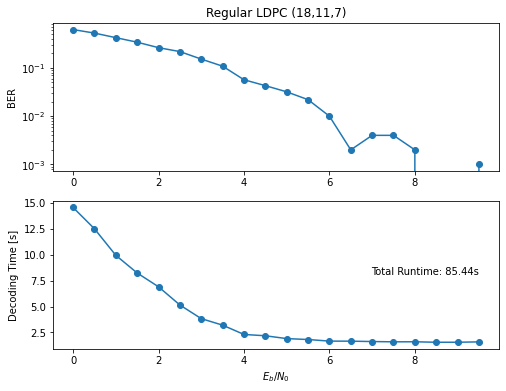

In [7]:
# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.semilogy(snrs,errs,'o-') # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Regular LDPC ({},{},{})'.format(n,k,n-k))
ax2.plot(snrs,times,'o-') # plot decode timing for different SNRs
ax2.set_xlabel('$E_b/N_0$')
ax2.set_ylabel('Decoding Time [s]')
ax2.annotate('Total Runtime: {:03.2f}s'.format(np.sum(times)),
            xy=(1, 0.35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(n,k))
plt.show()